# **Context:**

I've been studying data visualization lately and decided to use these dataset to practice. I really liked the dataset, it's about Spotify, the best-known music streaming service in the world. The columns in the dataset represent: 
- Artist: Name of artist;
- Streams: Number of times the artist's songs have been streamed on Spotify;
- Daily: The average number of streams an artist's music receives on a daily basis;
- As lead: Number of streams attributed to the artist when they are the lead or primary artist on a track;
- Solo: Number of streams garnered by the artist for their solo projects;
- As feature: number of streams the artist has accumulated when featured as a guest or collaborator on tracks by other artists.

# **Importing libraries and reading the dataset:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('artists.csv')
df.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"


# **Peek at the data:**

In [5]:
df.Artist.nunique()

2999

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


In [7]:
df.isnull().sum()

Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
cols_to_replace = ['Streams', 'As lead', 'Solo', 'As feature']
for col in cols_to_replace:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype('float')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   float64
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   float64
 4   Solo        2931 non-null   float64
 5   As feature  2662 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.8+ KB


In [10]:
df.describe()

,Streams,Daily,As lead,Solo,As feature
count,3000.000000,2994.000000,2984.000000,2931.000000,2662.000000
mean,2914.439967,1.854522,2152.790550,1519.900409,871.298685
std,4826.306507,3.758283,3590.730797,2736.927669,1965.651524
min,728.600000,0.002000,0.500000,0.100000,0.100000
25%,961.200000,0.480250,751.375000,360.300000,70.025000
50%,1459.400000,0.871000,1109.150000,803.700000,295.600000
75%,2680.800000,1.774250,2079.900000,1543.750000,838.925000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000


# **Distribuitions:**

## **Histograms:**

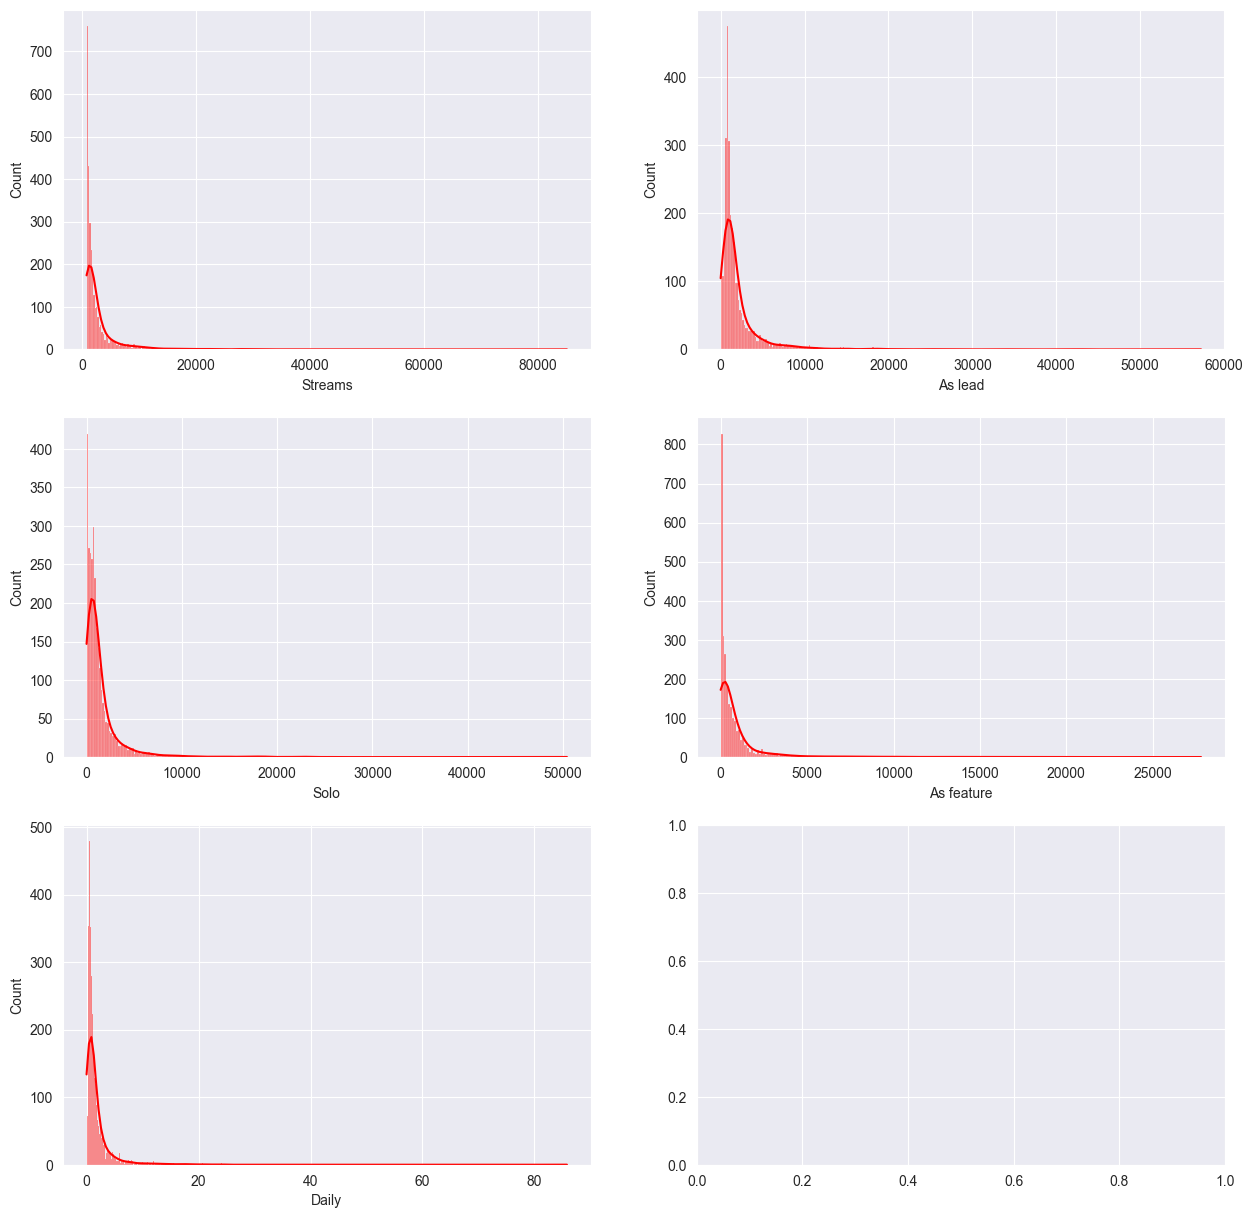

In [11]:
numeric_cols = ['Streams', 'As lead', 'Solo', 'As feature', 'Daily']

sns.set_style(style='darkgrid')
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax = ax.flat
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, color='red', ax=ax[i] )
plt.show()

## **BoxPlot:**

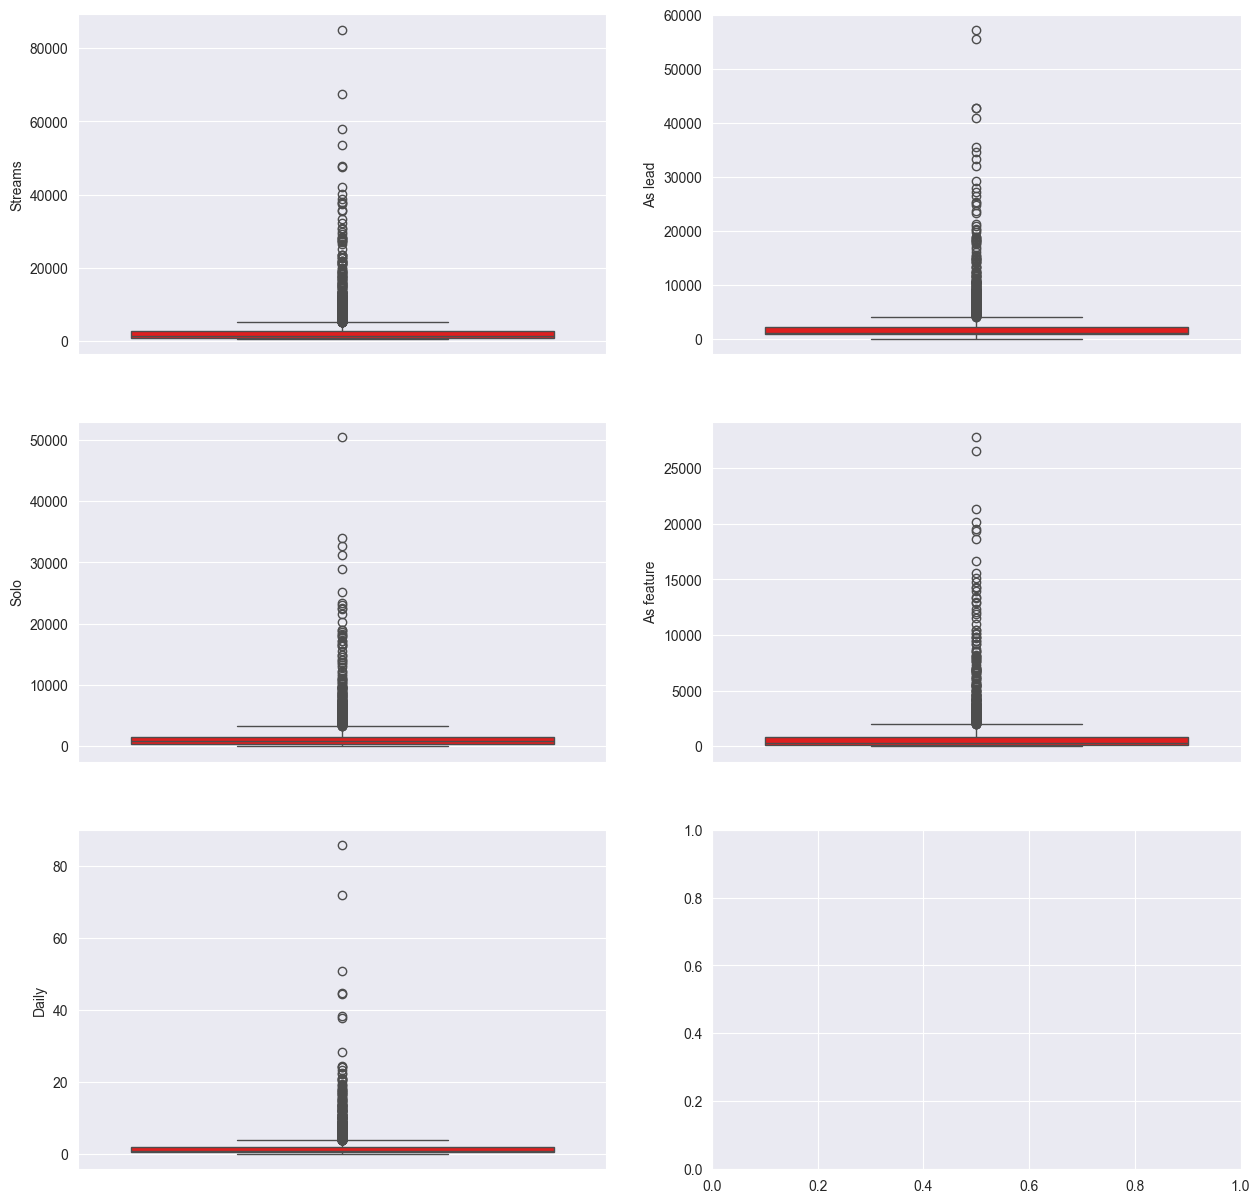

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax = ax.flat
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, color='red', ax=ax[i])
plt.show()

## **ViolinPlot:**

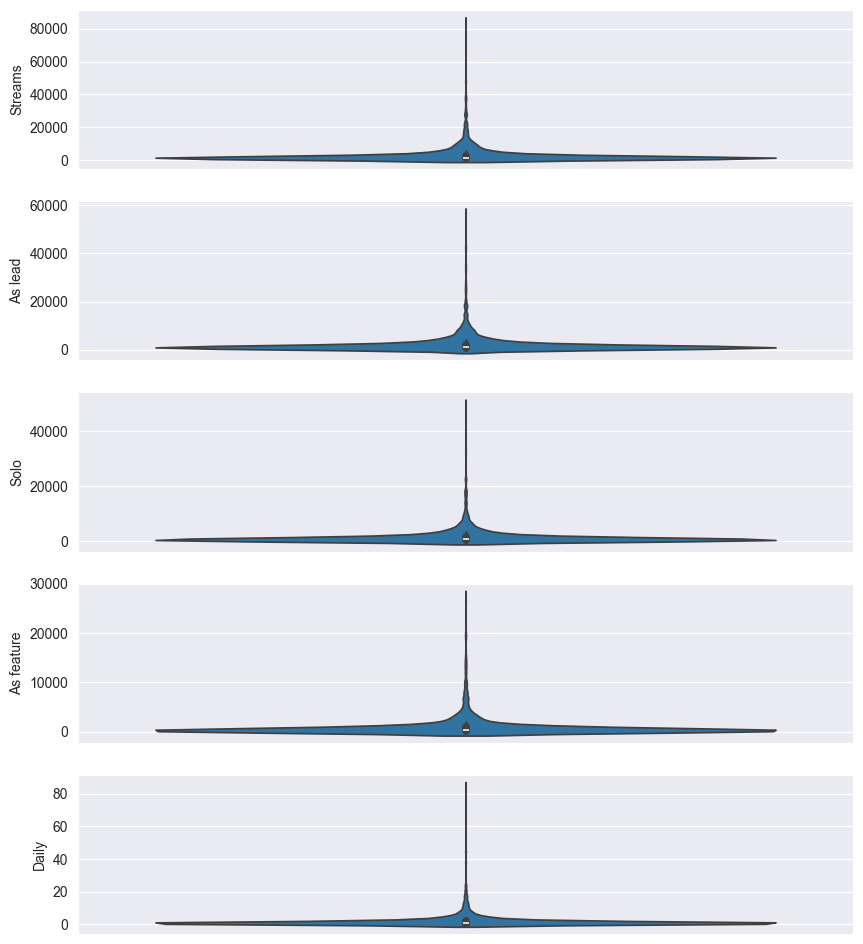

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(10, 12))
ax = ax.flat
for i, col in enumerate(numeric_cols):
    sns.violinplot(data=df, y=col, ax=ax[i])
plt.show()

# **BarPlot:**

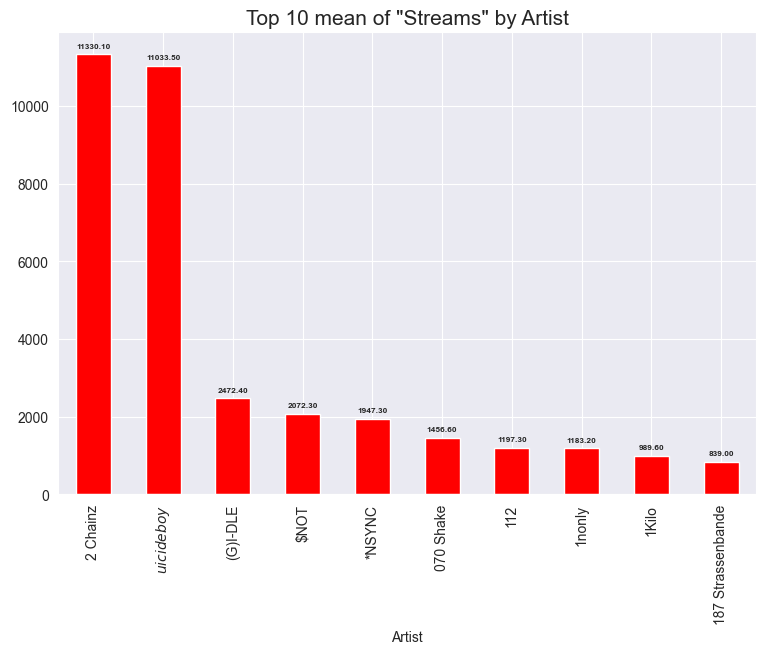

In [14]:
mean_streams = df.groupby('Artist')['Streams'].mean()[:10]

fig, ax = plt.subplots(figsize=(9,6))

mean_streams.sort_values(ascending=False).plot(kind='bar', color='red', ax=ax)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(text=f'{height:.2f}',
               xy = (p.get_x() + p.get_width()/2, height), 
               xytext=(0, 4),
               textcoords= 'offset points',
               ha = 'center',
               va = 'bottom',
               size=6,
               weight = 'bold' 
               )
plt.title('Top 10 mean of "Streams" by Artist', fontdict={'fontsize':15})
plt.show()

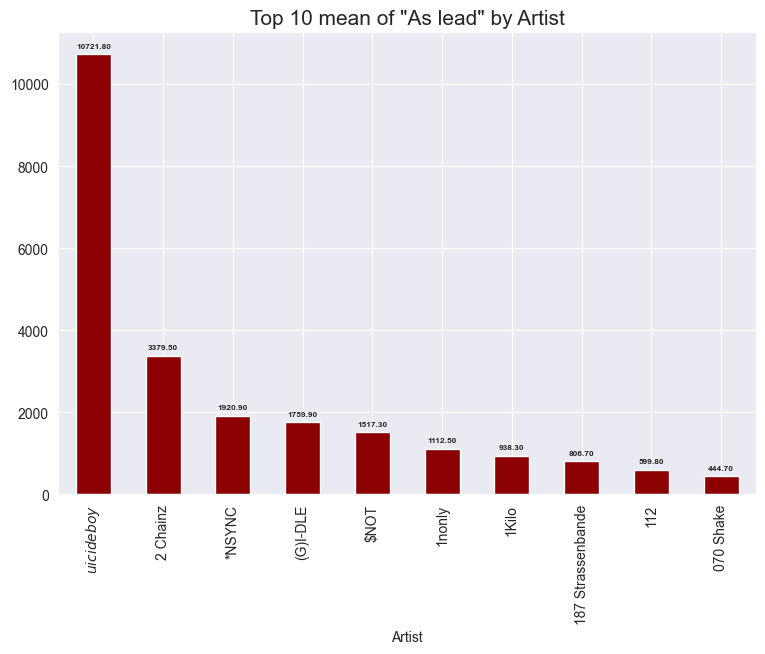

In [15]:
mean_lead = df.groupby('Artist')['As lead'].mean()[:10]

fig, ax = plt.subplots(figsize=(9,6))

mean_lead.sort_values(ascending=False).plot(kind='bar', color='darkred', ax=ax)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(text=f'{height:.2f}',
               xy = (p.get_x() + p.get_width()/2, height), 
               xytext=(0, 4),
               textcoords= 'offset points',
               ha = 'center',
               va = 'bottom',
               size=6,
               weight = 'bold' 
               )
plt.title('Top 10 mean of "As lead" by Artist', fontdict={'fontsize':15})
plt.show()

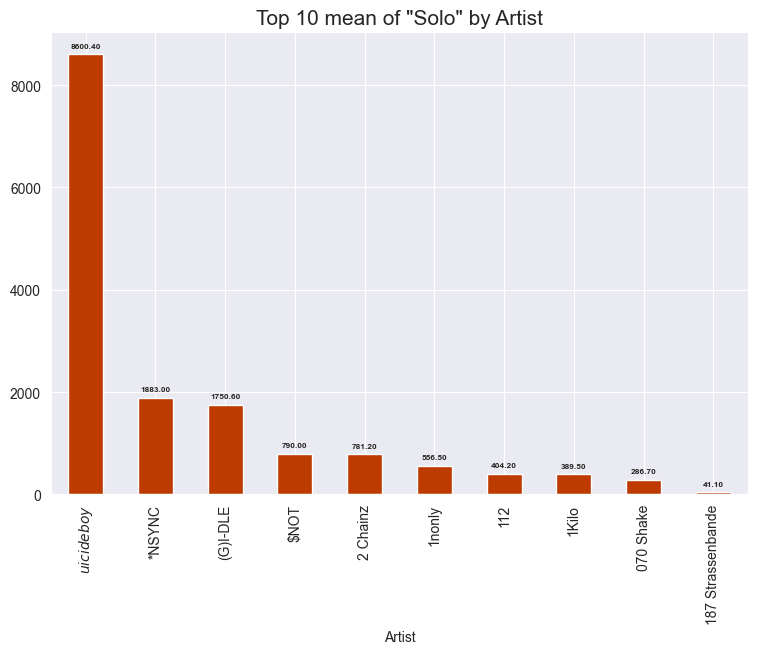

In [16]:
mean_solo = df.groupby('Artist')['Solo'].mean()[:10]

fig, ax = plt.subplots(figsize=(9,6))

mean_solo.sort_values(ascending=False).plot(kind='bar', color='#BD3A00', ax=ax)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(text=f'{height:.2f}',
               xy = (p.get_x() + p.get_width()/2, height), 
               xytext=(0, 4),
               textcoords= 'offset points',
               ha = 'center',
               va = 'bottom',
               size=6,
               weight = 'bold' 
               )
plt.title('Top 10 mean of "Solo" by Artist', fontdict={'fontsize':15})
plt.show()

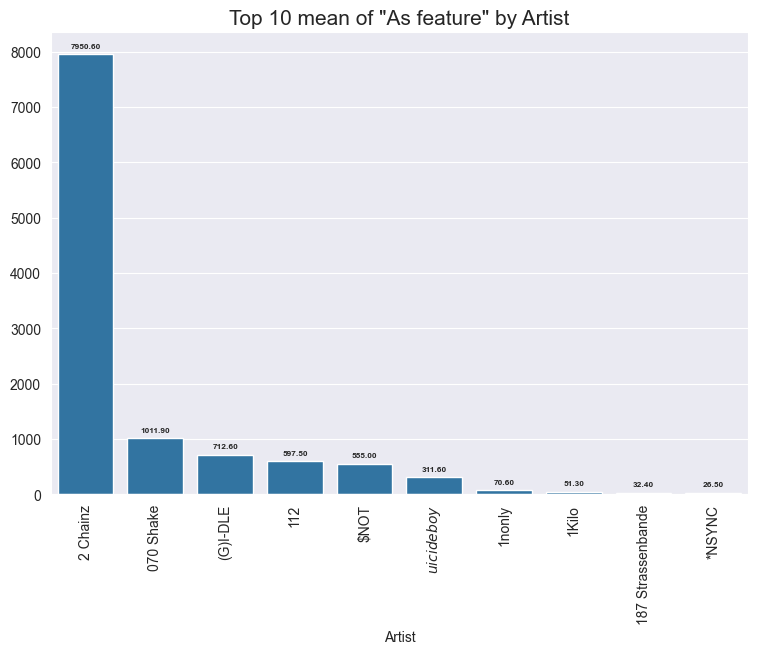

In [17]:
mean_as_feature = df.groupby('Artist')['As feature'].mean()[:10].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9,6))

sns.barplot(x=mean_as_feature.index,
            y=mean_as_feature.values,
            palette=sns.set_palette('pastel'), 
            ax=ax)

plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(text=f'{height:.2f}',
               xy = (p.get_x() + p.get_width()/2, height), 
               xytext=(0, 4),
               textcoords= 'offset points',
               ha = 'center',
               va = 'bottom',
               size=6,
               weight = 'bold' 
               )
plt.title('Top 10 mean of "As feature" by Artist', fontdict={'fontsize':15})
plt.show()

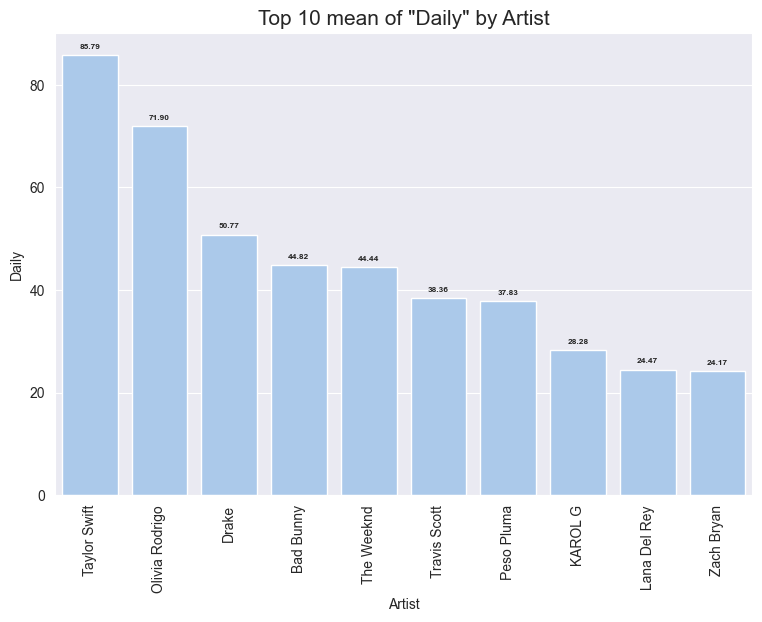

In [18]:
mean_daily = df[['Daily', 'Artist']].sort_values(by='Daily', ascending=False)[:10]
fig, ax = plt.subplots(figsize=(9,6))

sns.barplot(data= mean_daily, x='Artist',
            y='Daily',
            palette=sns.set_palette('pastel'), 
            ax=ax)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(text=f'{height:.2f}',
               xy = (p.get_x() + p.get_width()/2, height), 
               xytext=(0, 4),
               textcoords= 'offset points',
               ha = 'center',
               va = 'bottom',
               size=6,
               weight = 'bold' 
               )

plt.title('Top 10 mean of "Daily" by Artist', fontdict={'fontsize':15})
plt.show()

# **PairPlot:**

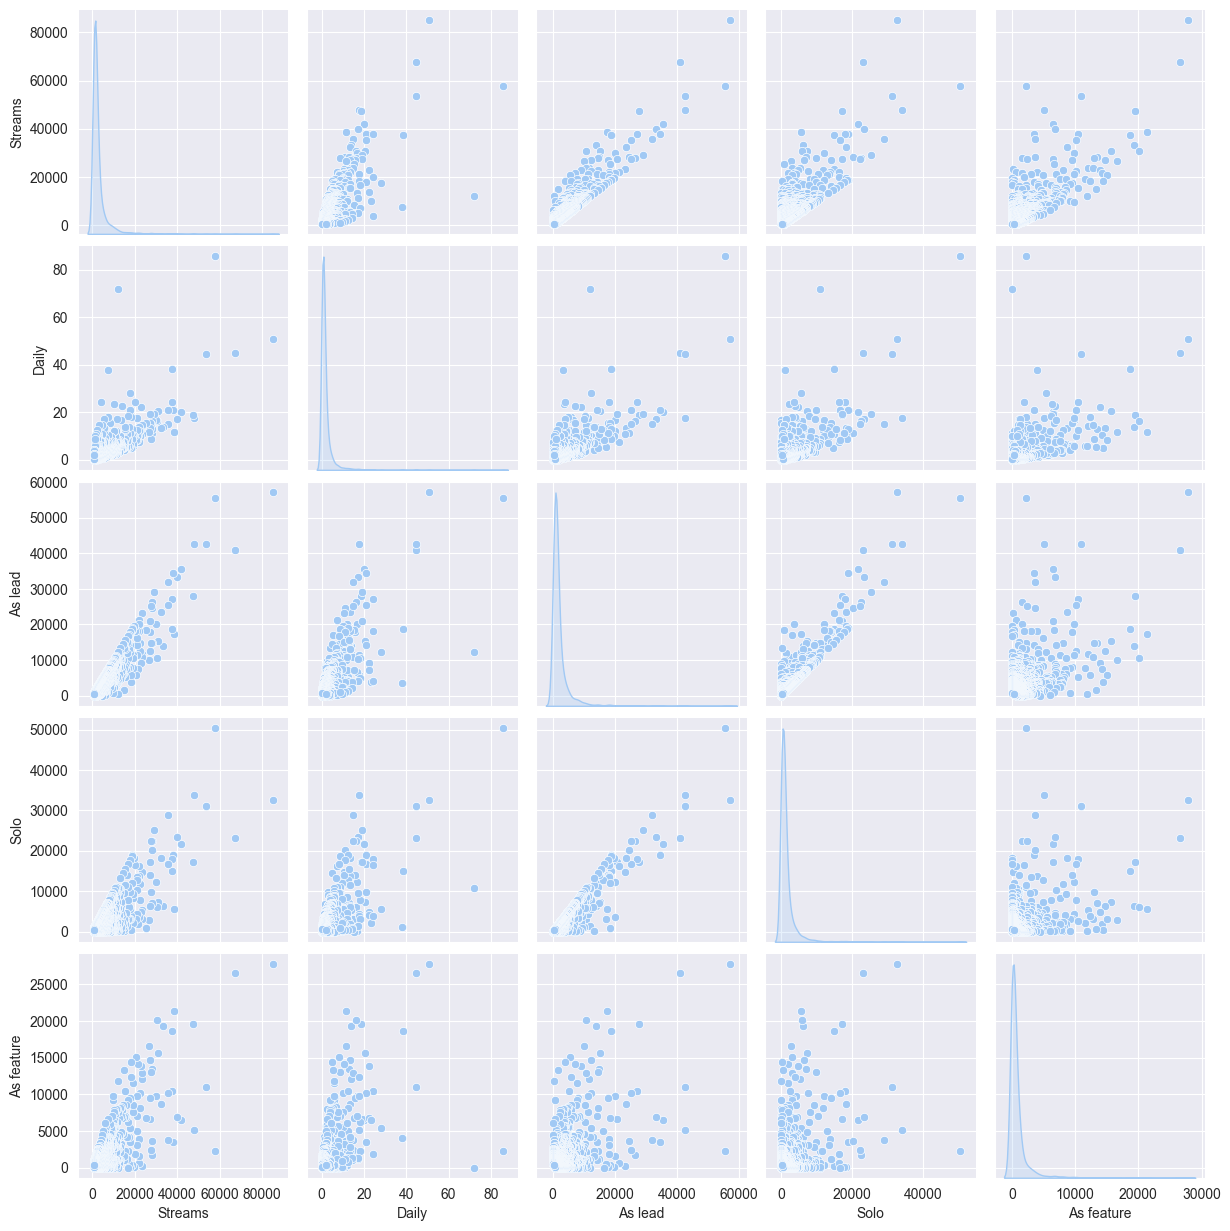

In [19]:
pair_plot = sns.pairplot(df, diag_kind='kde')
plt.show()

# **HeatMap:**

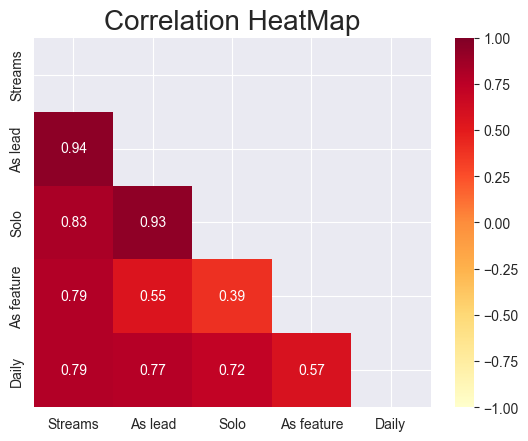

In [20]:
corr = df[numeric_cols].corr()
mask = np.triu(corr)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
plt.title('Correlation HeatMap', fontdict={'fontsize':20})
plt.show()

**Thank you!!**

if you have any suggestions I would love to hear them.